In [1]:
N_SWITCHES = 50
N_CONTROLLERS = 10

# Definindo a rede

In [2]:
import networkx as nx
graph = nx.random_internet_as_graph(N_SWITCHES)

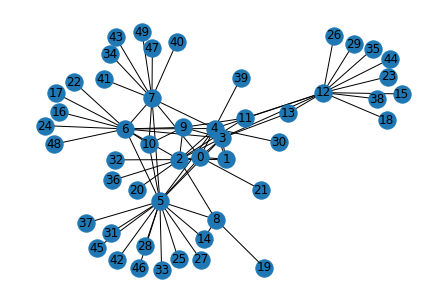

In [3]:
from matplotlib import pyplot as plt

pos = nx.spring_layout(graph)
labels = nx.get_edge_attributes(graph, 'weight')
nx.draw(graph, with_labels=True)
nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
plt.show()

In [4]:
from networkx import all_pairs_shortest_path_length

network_delay_matrix = dict(all_pairs_shortest_path_length(graph))

# Executando o algorítimo

In [5]:
from src.genetics import CPP

cpp = CPP(N_SWITCHES, N_CONTROLLERS, 0.8, network_delay_matrix)
cpp.execute()

Sampling size: 200


In [ ]:
hist = cpp.res.history[0]
hist

In [6]:
import pandas as pd

data = pd.DataFrame()

for i, ite in enumerate(cpp.res.history):
    population = pd.DataFrame(data=ite.opt.get("F"), columns=["SC_Avg_Delay", "CC_Avg_Delay", "Load_Imbalance"])
    population["Generation"] = i
    data = data.append(population)

data.to_csv("generations.csv")

,SC_Avg_Delay,CC_Avg_Delay,Load_Imbalance,Generation
0,0.8,1.2184,2.0,0
1,1.3,1.1320,1.0,0
2,1.0,1.1648,2.0,0
3,1.7,1.1112,2.0,0
4,1.0,1.2248,1.0,0
...,...,...,...,...
195,1.2,0.0000,1.0,199
196,1.2,0.0000,1.0,199
197,1.2,0.0000,1.0,199
198,1.2,0.0000,1.0,199


In [9]:
import plotly.express as px

fig = px.scatter_3d(data, x="SC_Avg_Delay", y="CC_Avg_Delay", z="Load_Imbalance", animation_frame="Generation")
fig.show()

# plot = Scatter()
# plot.add(cpp.problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
# plot.add(cpp.res.F, facecolor="none", edgecolor="red")
# plot.show()